### **Problem Statement:**

Leveraging the data of customers collected by Yulu which consists of datetime, season, holiday, working day, weather, temperature, humidity, wind speed, count of casual and registered users and total count of rental bikes to analyze

a) Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

b) How well those variables describe the electric cycle demands



In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
#Loading the dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#shape of dataset
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatypes of following attributes needs to be converted to proper datatype:

* datetime- to datetime
* season- to categorical
* holiday- to categorical
* workingday- to categorical
* weather- to categorical

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

cat=['season','holiday','workingday','weather']

for col in cat:
  df[col]=df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
#Check null values
np.any(df.isna())

False

In [ ]:
#Check duplicated values
np.any(df.duplicated())

False

No null values or duplicated values available in dataset

In [ ]:
#Statistical description
df.iloc[:,1:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.iloc[:,1:].describe(include='object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
#No of unique values in each column
for i in df.columns:
  print(i,": ",df[i].nunique())

datetime :  10886
season :  4
holiday :  2
workingday :  2
weather :  4
temp :  49
atemp :  60
humidity :  89
windspeed :  28
casual :  309
registered :  731
count :  822


### **Checking value counts for Categorical Variable**

In [ ]:
cols=['season','holiday','workingday','weather']

for i in cols:
  print(df[i].value_counts(),'\n\n\n')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 



0    10575
1      311
Name: holiday, dtype: int64 



1    7412
0    3474
Name: workingday, dtype: int64 



1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 





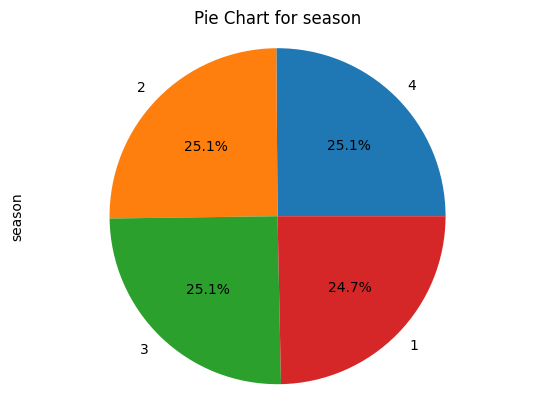

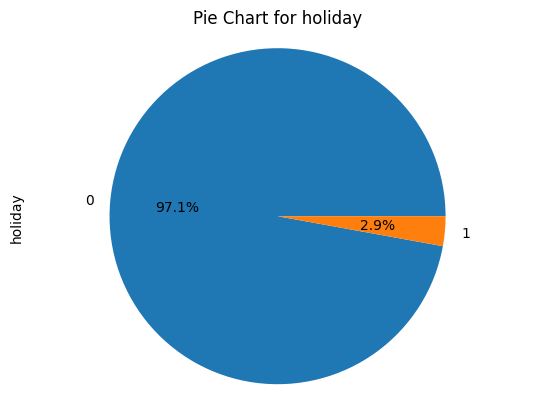

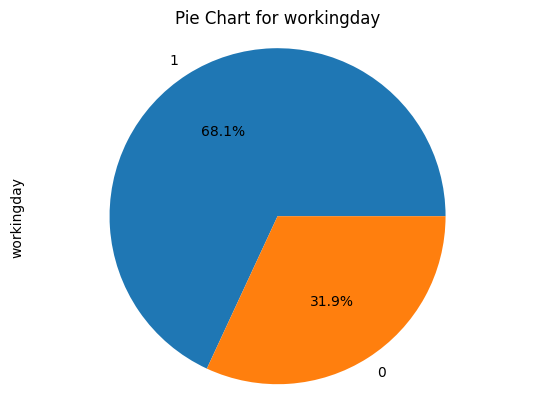

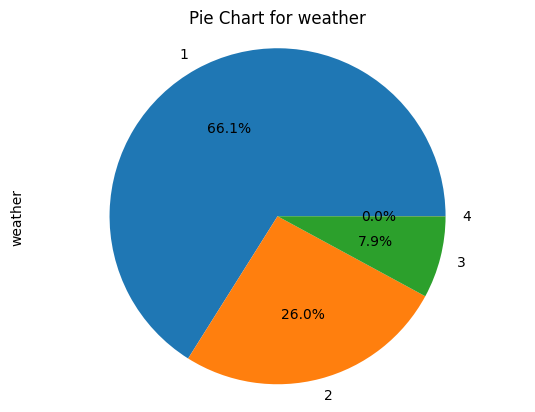

In [ ]:
for column_name in cols:
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

**Observations:**

1. Data is distributed uniformly across all seasons

2. Majority of data consists of non-holiday days

3. Majority of data consists of weekdays

4. Majority of Days having clear weather

In [ ]:
# minimum datetime and maximum datetime
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [ ]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [ ]:
df['day']=df['datetime'].dt.day_name()
df['month']=df['datetime'].dt.month_name()

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,January


### **Correlation b/w the columns of DataFrame**

In [ ]:
# A broader look at correlation between the columns of dataframe

# Creating a copy of the dataframe -
df_copy=df.copy()

df_copy['season'].replace({'1':1,'2':2,'3':3,'4':4},inplace=True)
df_copy['holiday'].replace(['0','1'],[0,1],inplace=True)
df_copy['workingday'].replace(['0','1'],[0,1],inplace=True)
df_copy['weather'].replace({'1':1,'2':2,'3':3,'4':4},inplace=True)

df_copy.corr()

<ipython-input-19-61b17e916630>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<ipython-input-20-2e2a874c16b3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)


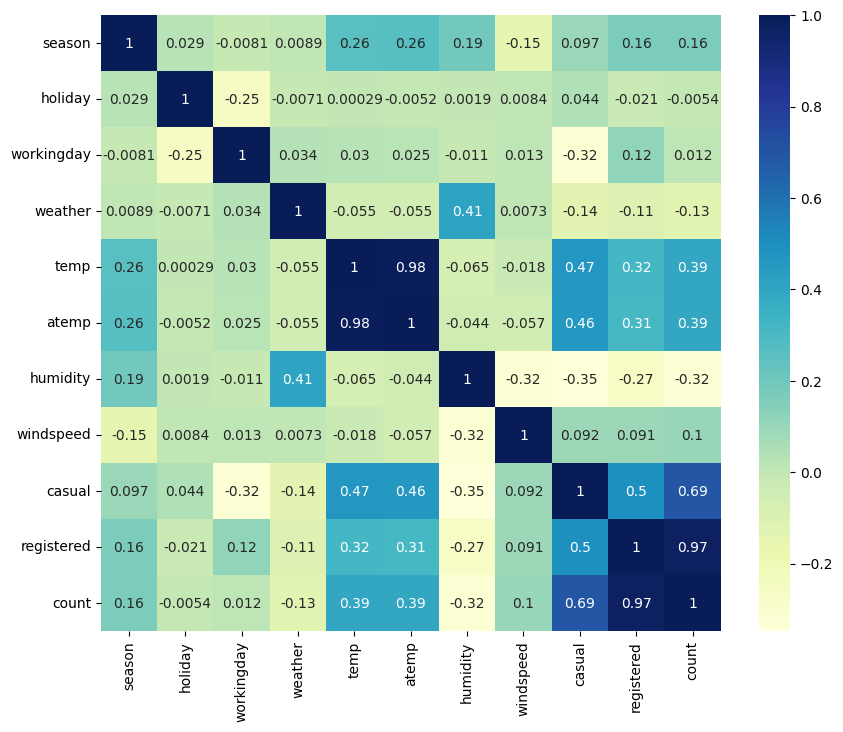

In [ ]:
# Correlation Plot above as a Heatmap -

plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observations**

1. Temperature is positively co-related with total number of users (Both registered and casual)

2. Humidity is negatively co-related with total number of users (Both registered and casual)

**Outliers detection**


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,January


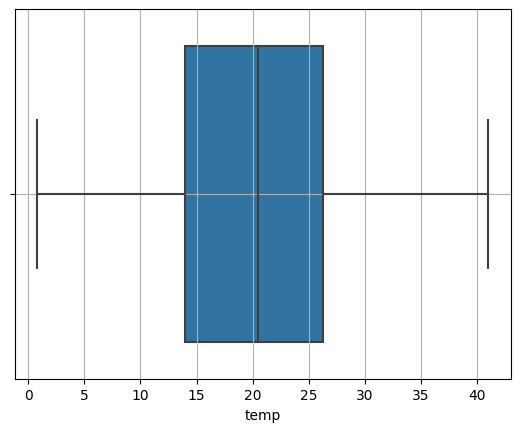

In [ ]:
ax=sns.boxplot(x=df_copy['temp'])
plt.grid()
plt.show()

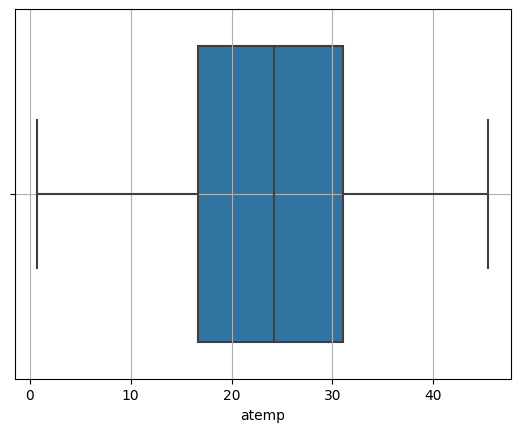

In [ ]:
ax=sns.boxplot(x=df_copy['atemp'])
plt.grid()
plt.show()

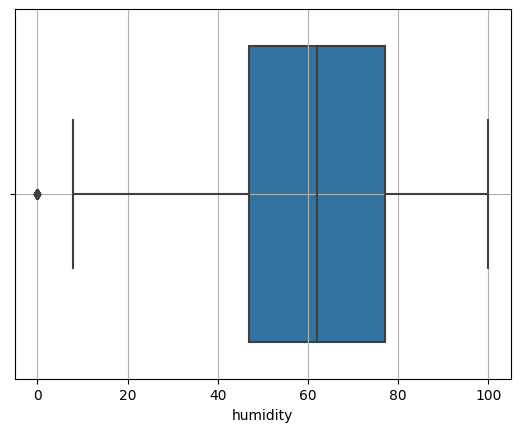

In [ ]:
ax=sns.boxplot(x=df_copy['humidity'])
plt.grid()
plt.show()

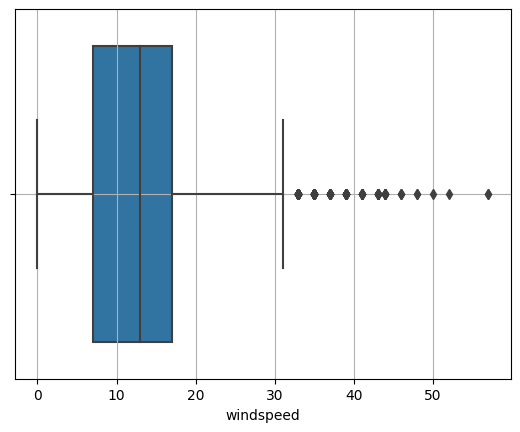

In [ ]:
ax=sns.boxplot(x=df_copy['windspeed'])
plt.grid()
plt.show()

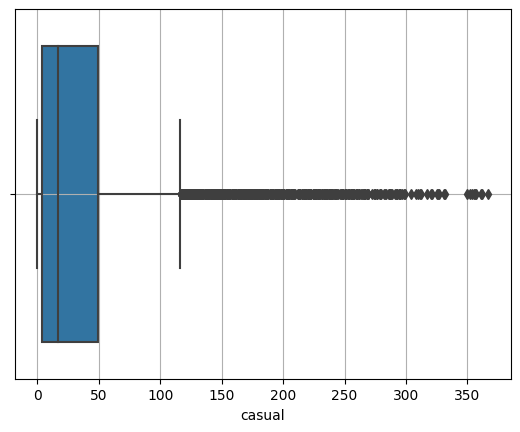

In [ ]:
ax=sns.boxplot(x=df_copy['casual'])
plt.grid()
plt.show()

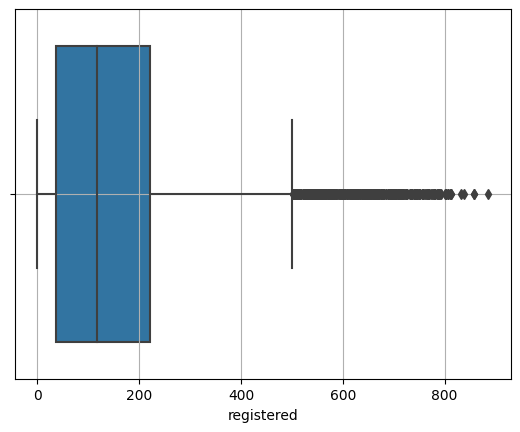

In [ ]:
ax=sns.boxplot(x=df_copy['registered'])
plt.grid()
plt.show()

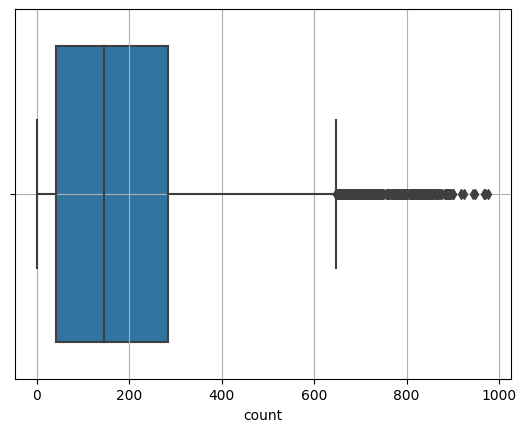

In [ ]:
ax=sns.boxplot(x=df_copy['count'])
plt.grid()
plt.show()

* Indeed, the existence of outliers in our dataset is evident; however, their removal comes at the cost of losing valuable information.

* In determining whether to remove outliers, several factors come into play:

  * Firstly, we must ascertain whether outliers result from measurement or data entry errors. If the answer is affirmative, then removal may be considered.

  * Secondly, if an outlier does not represent a facet of the population under study and can be attributed to an unusual condition, it may warrant removal.

  * Conversely, if an outlier is a legitimate part of our natural population, it should be retained rather than removed.

* Regarding the number of Casual and registered user columns, outliers stem from the peak time of users opting for shared electric cycles, leading to higher number of users. Consequently, it is not advisable to remove these outliers from the given dataset. However, for illustration purposes, we provide a demonstration of how to mathematically identify and subsequently eliminate outliers from the dataset.

In [ ]:
#For illustrative purpose

data = df['count']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
if lower < 0:
  lower=0
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  191.57413191254824
Median :  145.0
1st Quartile :  42.0
3rd Quartile :  284.0
Innerquartile Range :  242.0
Upper Bound :  647.0
Lower Bound :  0
Outliers :  [648, 648, 649, 649, 650, 651, 651, 651, 652, 653, 653, 653, 654, 654, 654, 654, 655, 656, 656, 657, 658, 659, 659, 659, 660, 661, 662, 662, 662, 662, 663, 665, 666, 667, 668, 668, 668, 668, 668, 668, 669, 669, 670, 671, 671, 671, 671, 672, 672, 673, 673, 673, 674, 674, 676, 676, 677, 677, 678, 678, 678, 678, 678, 678, 679, 679, 679, 679, 680, 680, 681, 681, 681, 681, 681, 682, 682, 683, 684, 684, 685, 686, 686, 686, 686, 687, 687, 688, 689, 689, 690, 691, 692, 692, 692, 693, 693, 694, 694, 694, 696, 698, 698, 700, 701, 702, 702, 704, 704, 704, 704, 705, 705, 706, 706, 708, 710, 710, 710, 711, 712, 712, 713, 713, 713, 713, 715, 715, 717, 719, 719, 721, 721, 722, 723, 723, 724, 724, 724, 725, 729, 729, 729, 729, 730, 730, 730, 730, 731, 731, 732, 733, 734, 737, 737, 738, 738, 739, 741, 743, 743, 743, 743, 744, 744, 744, 745,

In [ ]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

Mean value of users before outliers removal: 191.57

Median value of users before outliers removal: 145

In [ ]:
new_df_without_outliers=data[(data>=lower) & (data<=upper)]
new_df_without_outliers.describe()

count    10586.000000
mean       175.717079
std        156.360023
min          1.000000
25%         40.000000
50%        138.000000
75%        270.000000
max        647.000000
Name: count, dtype: float64

Mean value of users after outliers removal: 175.71

Median value of users after outliers removal: 138

**Univariate Analysis**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,January


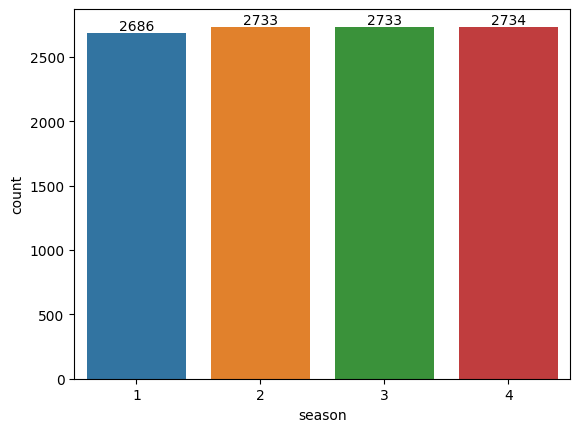

In [ ]:
label=sns.countplot(x=df['season'])
for i in label.containers:
    label.bar_label(i)

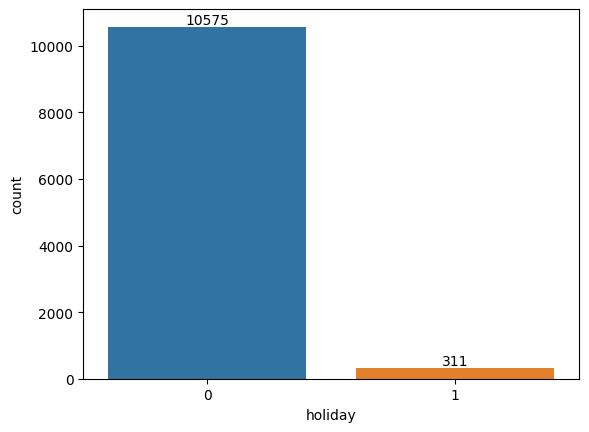

In [ ]:
label=sns.countplot(x=df['holiday'])
for i in label.containers:
    label.bar_label(i)

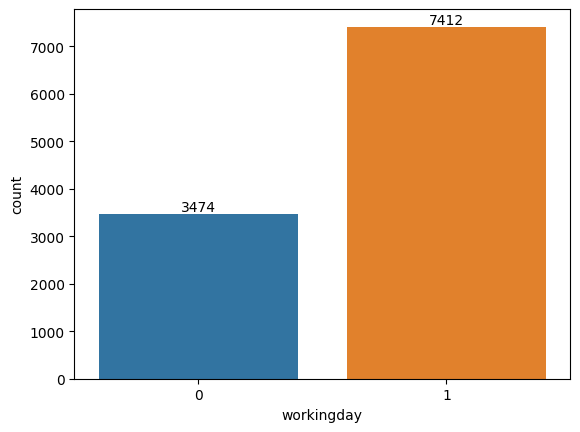

In [ ]:
label=sns.countplot(x=df['workingday'])
for i in label.containers:
    label.bar_label(i)

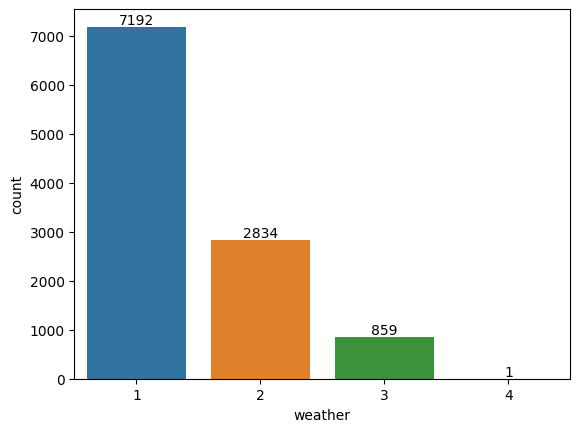

In [ ]:
label=sns.countplot(x=df['weather'])
for i in label.containers:
    label.bar_label(i)

[]

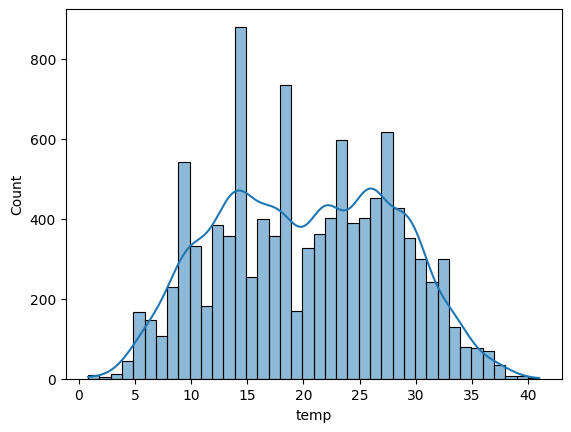

In [ ]:
# The below code generates a histogram plot for the 'temp' feature, showing the distribution of
    # temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

[]

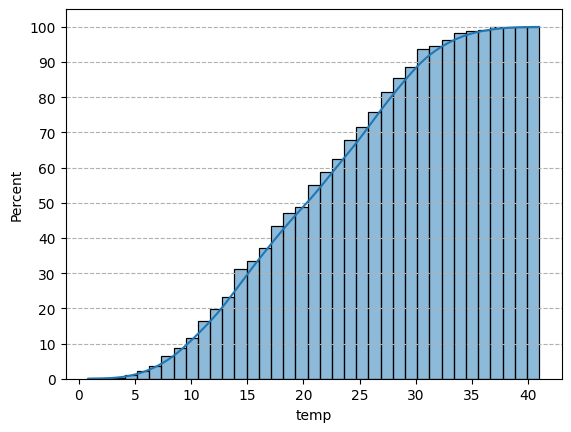

In [ ]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative
    # distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

[]

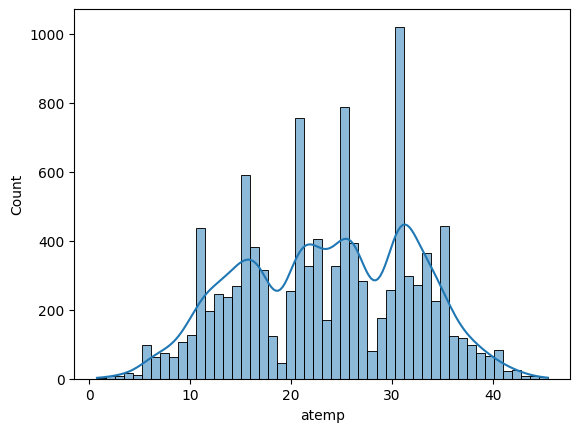

In [ ]:
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()        # displaying the chart

[]

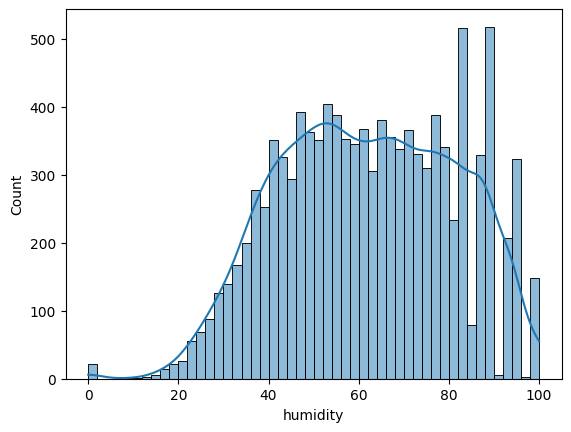

In [ ]:
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()        # displaying the chart

[]

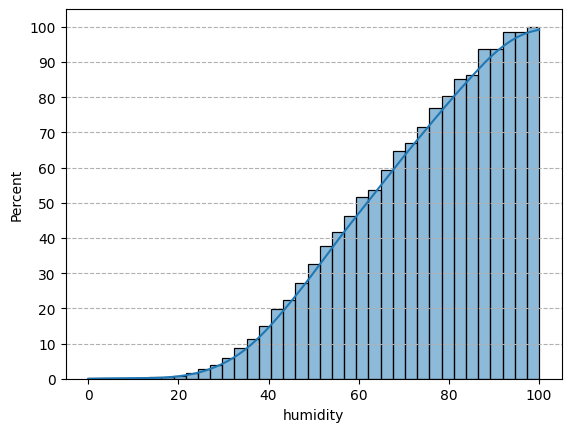

In [ ]:
sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

[]

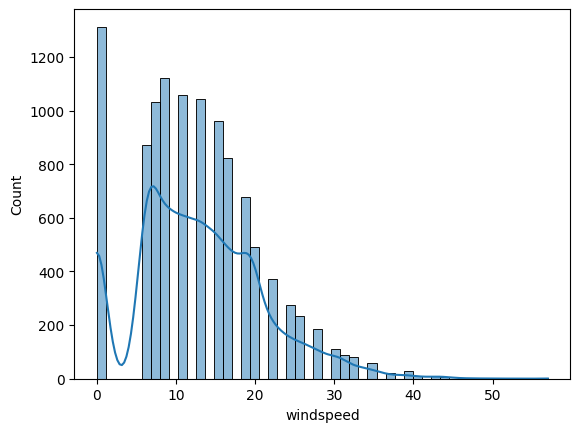

In [ ]:
sns.histplot(data = df, x = 'windspeed', kde = True, bins = 50)
plt.plot()        # displaying the chart

[]

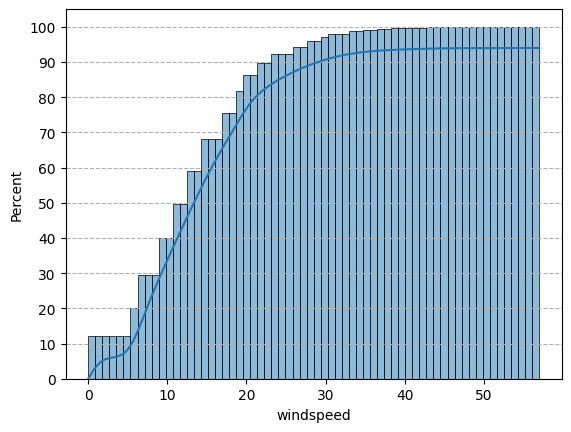

In [ ]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

[]

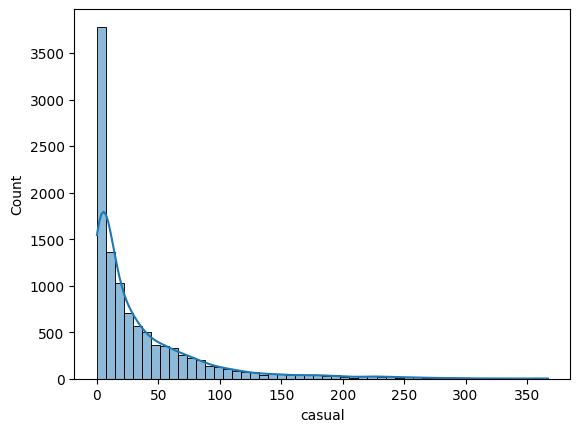

In [ ]:
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()        # displaying the chart

[]

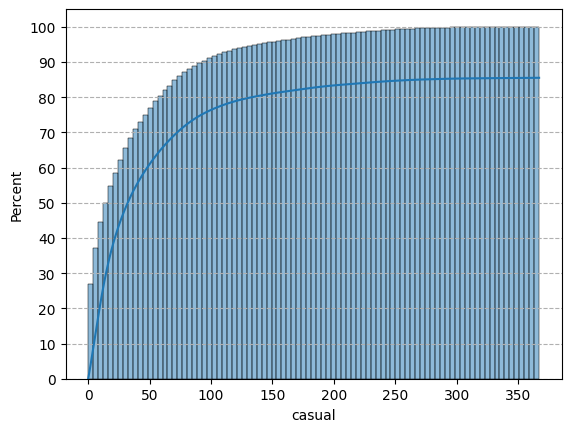

In [ ]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

[]

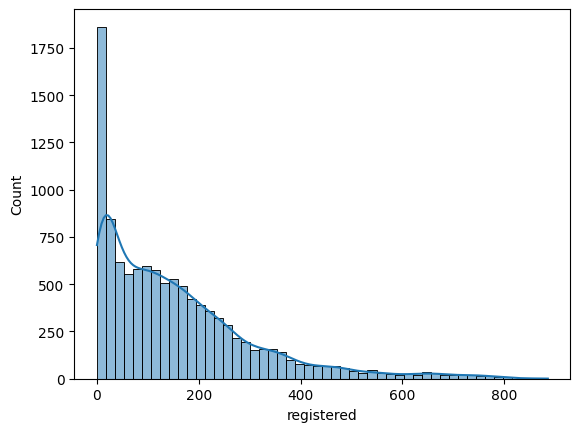

In [ ]:
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()        # displaying the chart

[]

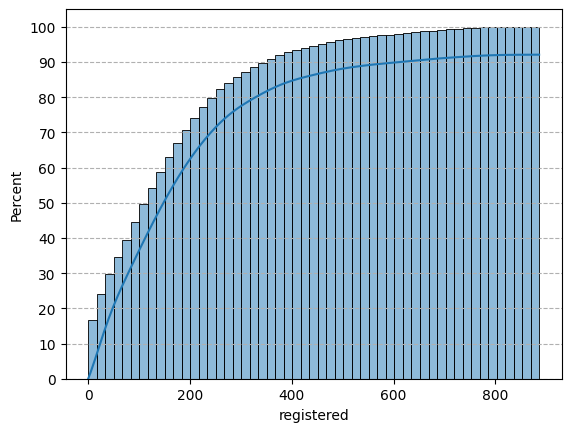

In [ ]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

**Observations:**

1. Data is distributed uniformly across all seasons

2. Majority of data consists of non-holiday days

3. Majority of data consists of weekdays

4. Majority of Days having clear weather

5. Around 80% of the time, temperature is lesser than 28 deg C

6. Around 80% of the time, humidity is greater than 40 i.e. having optimal or too moist

7. Around 85% of the time, windspeed is lesser than 20

8. Around 80% of casual users are less than 60

9. Around 85% of registred users are less than 300

**Bivariate Analysis**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,January


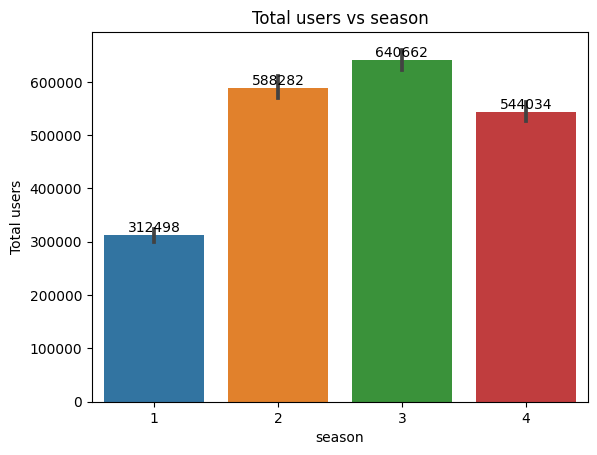

In [ ]:
label=sns.barplot(data=df,x='season',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs season')
plt.ylabel('Total users')
plt.show()

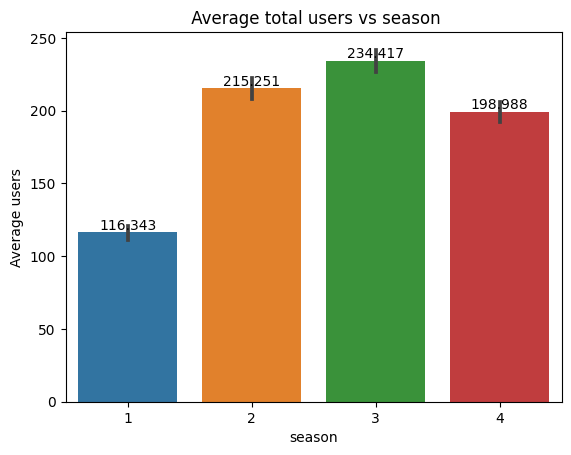

In [ ]:
label=sns.barplot(data=df,x='season',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title(' Average total users vs season')
plt.ylabel('Average users')
plt.show()

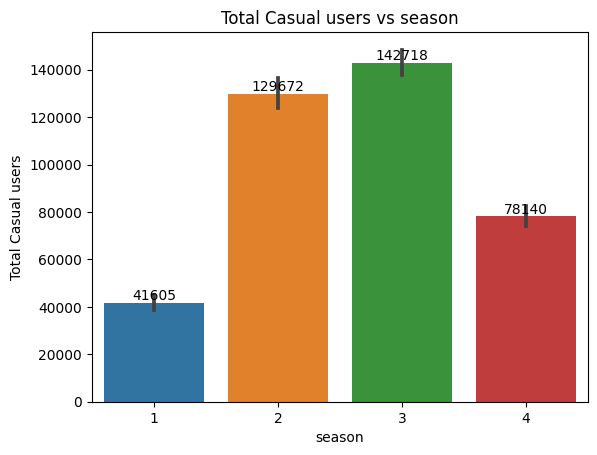

In [ ]:
label=sns.barplot(data=df,x='season',y='casual',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total Casual users vs season')
plt.ylabel('Total Casual users')
plt.show()

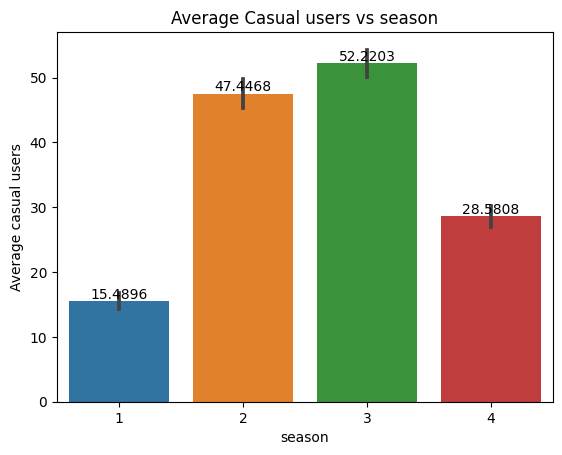

In [ ]:
label=sns.barplot(data=df,x='season',y='casual',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Average Casual users vs season')
plt.ylabel('Average casual users')
plt.show()

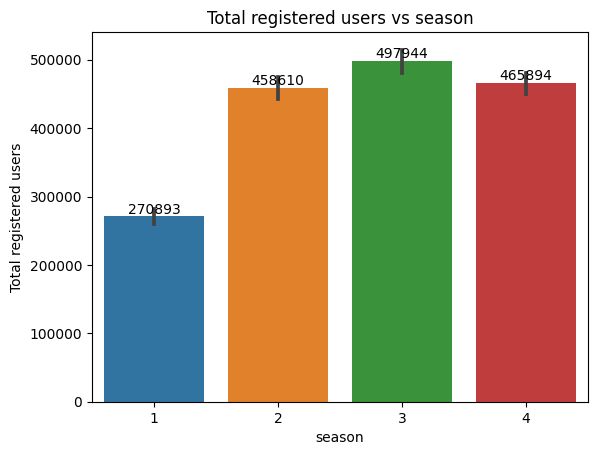

In [ ]:
label=sns.barplot(data=df,x='season',y='registered',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total registered users vs season')
plt.ylabel('Total registered users')
plt.show()

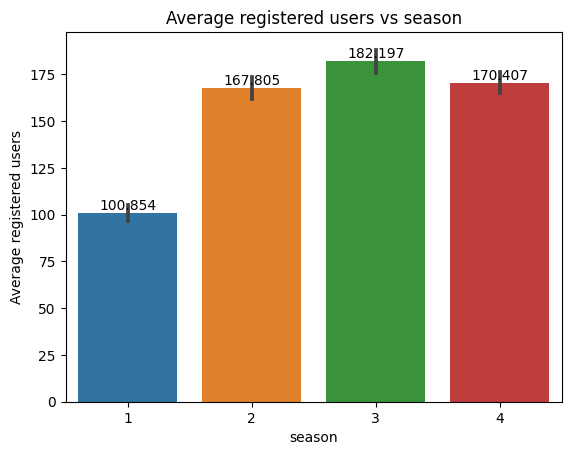

In [ ]:
label=sns.barplot(data=df,x='season',y='registered',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Average registered users vs season')
plt.ylabel('Average registered users')
plt.show()

[]

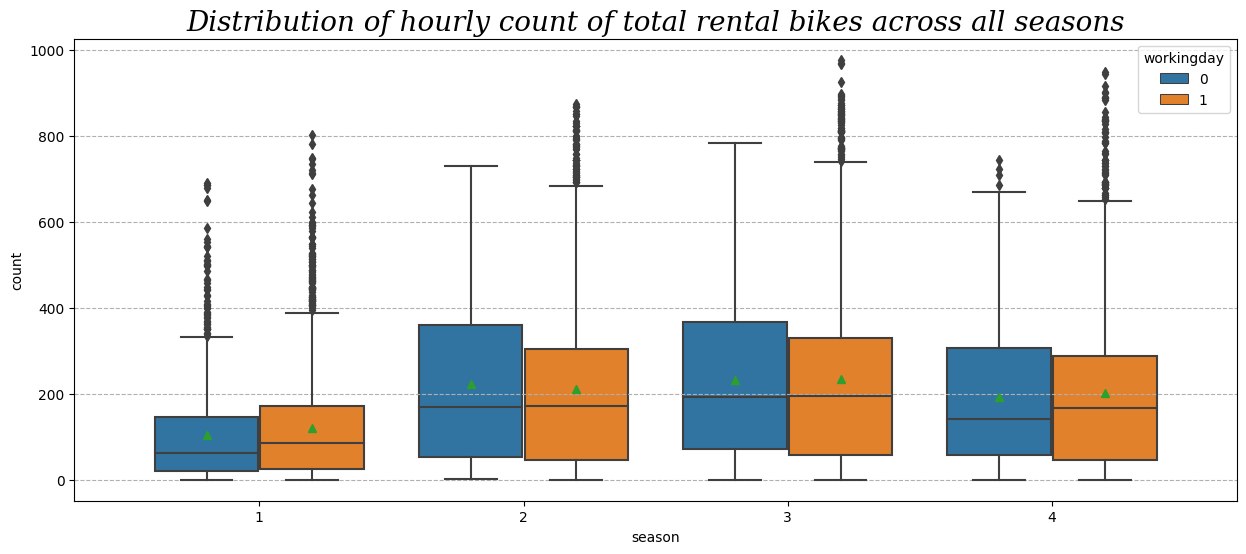

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

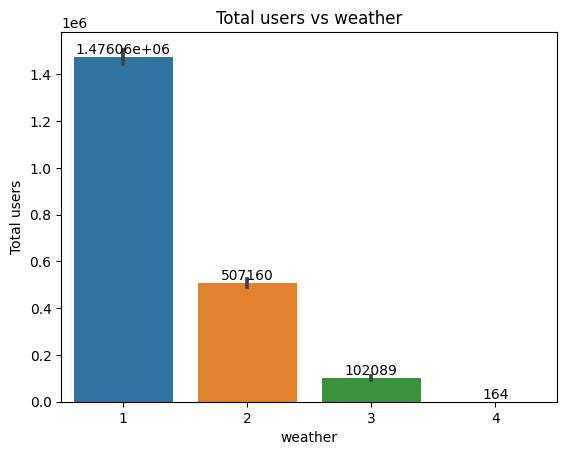

In [ ]:
label=sns.barplot(data=df,x='weather',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs weather')
plt.ylabel('Total users')
plt.show()

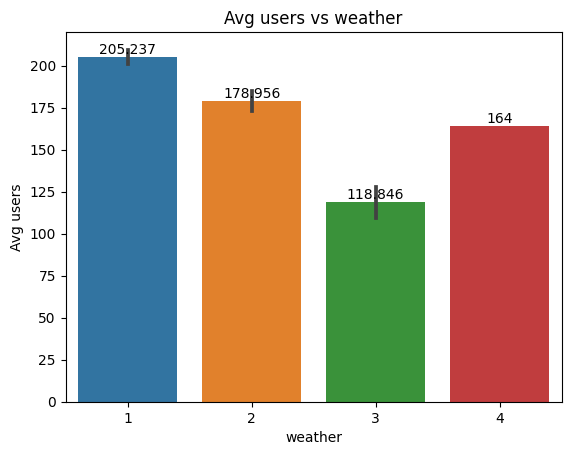

In [ ]:
label=sns.barplot(data=df,x='weather',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Avg users vs weather')
plt.ylabel('Avg users')
plt.show()

[]

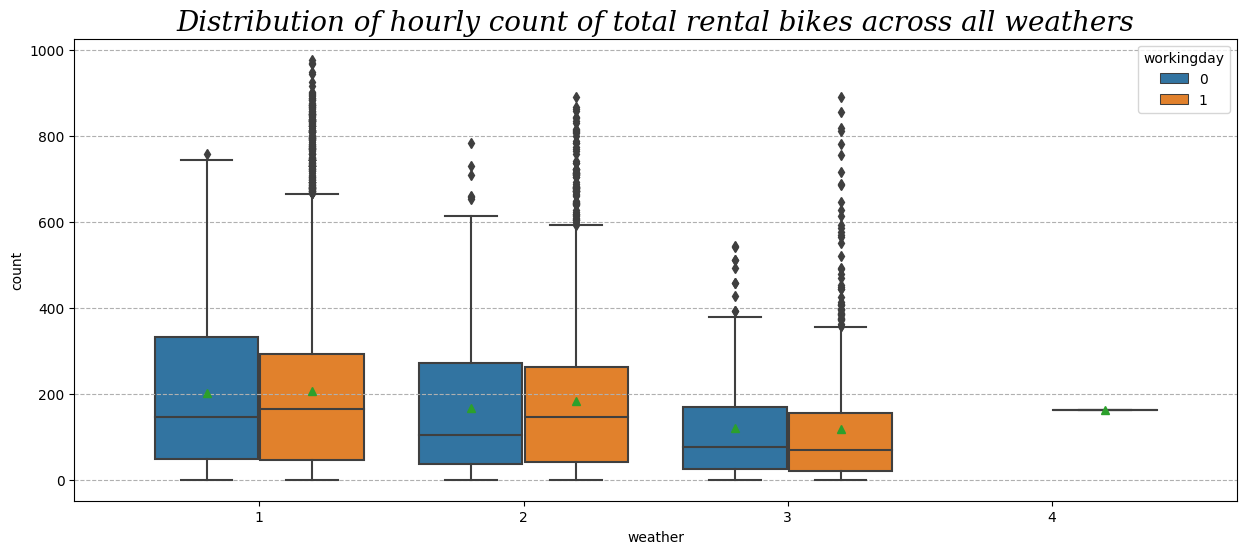

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

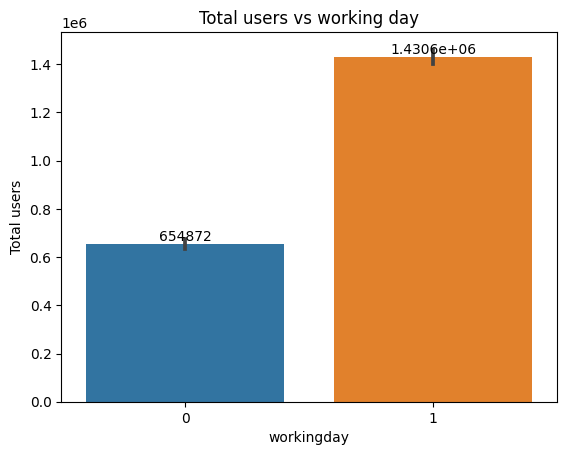

In [ ]:
label=sns.barplot(data=df,x='workingday',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs working day')
plt.ylabel('Total users')
plt.show()

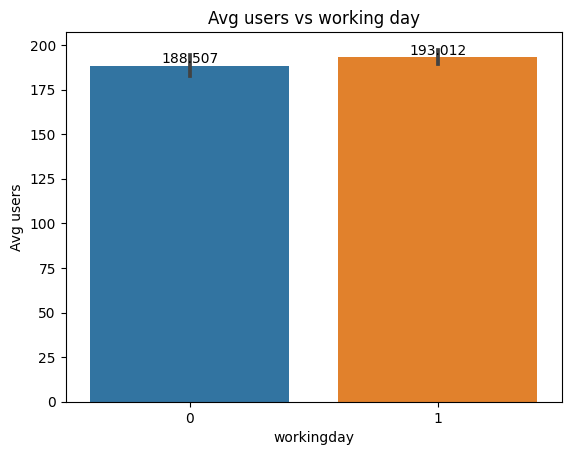

In [ ]:
label=sns.barplot(data=df,x='workingday',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Avg users vs working day')
plt.ylabel('Avg users')
plt.show()

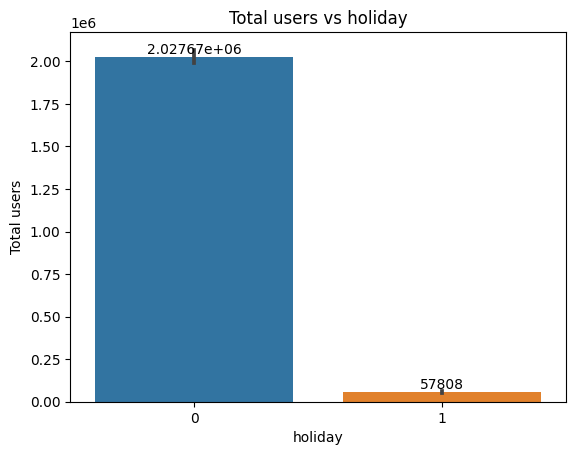

In [ ]:
label=sns.barplot(data=df,x='holiday',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs holiday')
plt.ylabel('Total users')
plt.show()

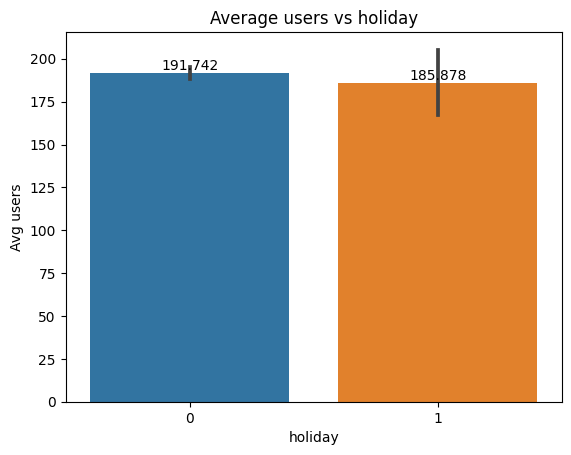

In [ ]:
label=sns.barplot(data=df,x='holiday',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Average users vs holiday')
plt.ylabel('Avg users')
plt.show()

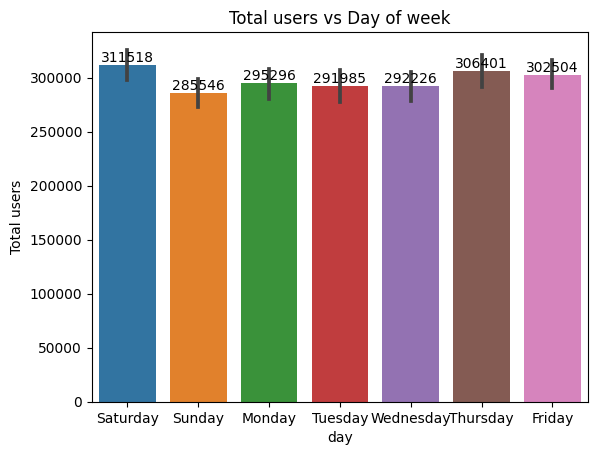

In [ ]:
label=sns.barplot(data=df,x='day',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs Day of week')
plt.ylabel('Total users')
plt.show()

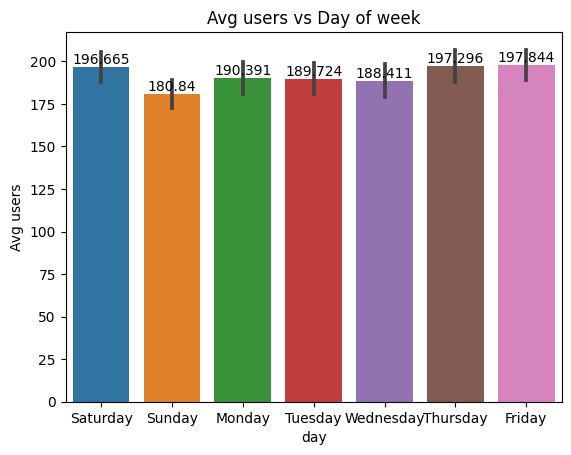

In [ ]:
label=sns.barplot(data=df,x='day',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Avg users vs Day of week')
plt.ylabel('Avg users')
plt.show()

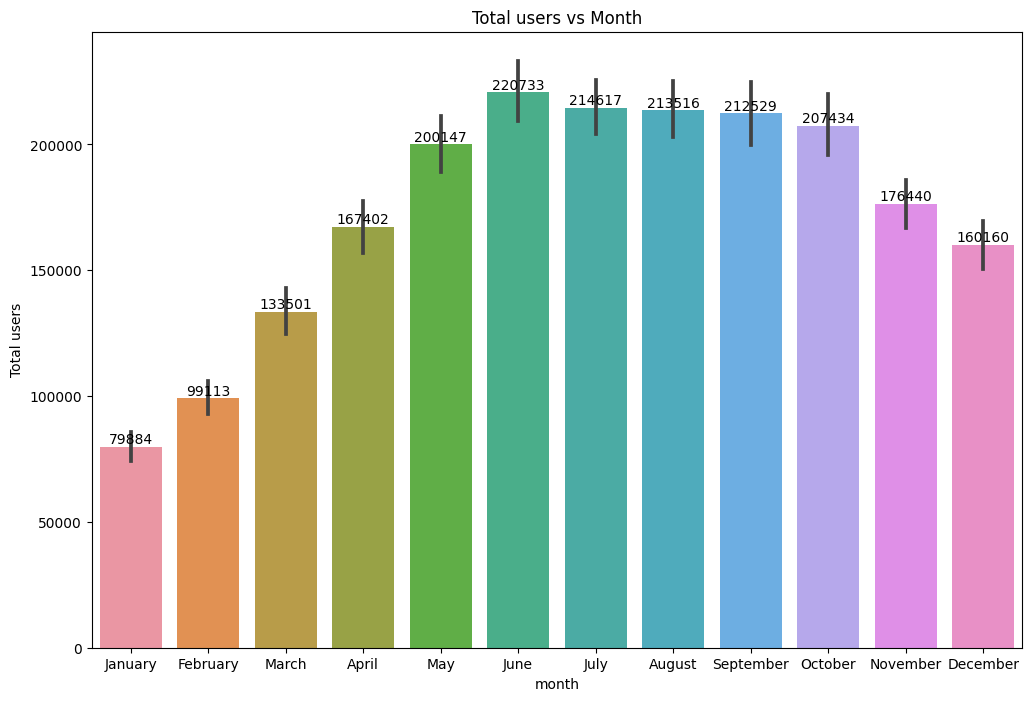

In [ ]:
plt.figure(figsize=(12,8))
label=sns.barplot(data=df,x='month',y='count',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Total users vs Month')
plt.ylabel('Total users')
plt.show()

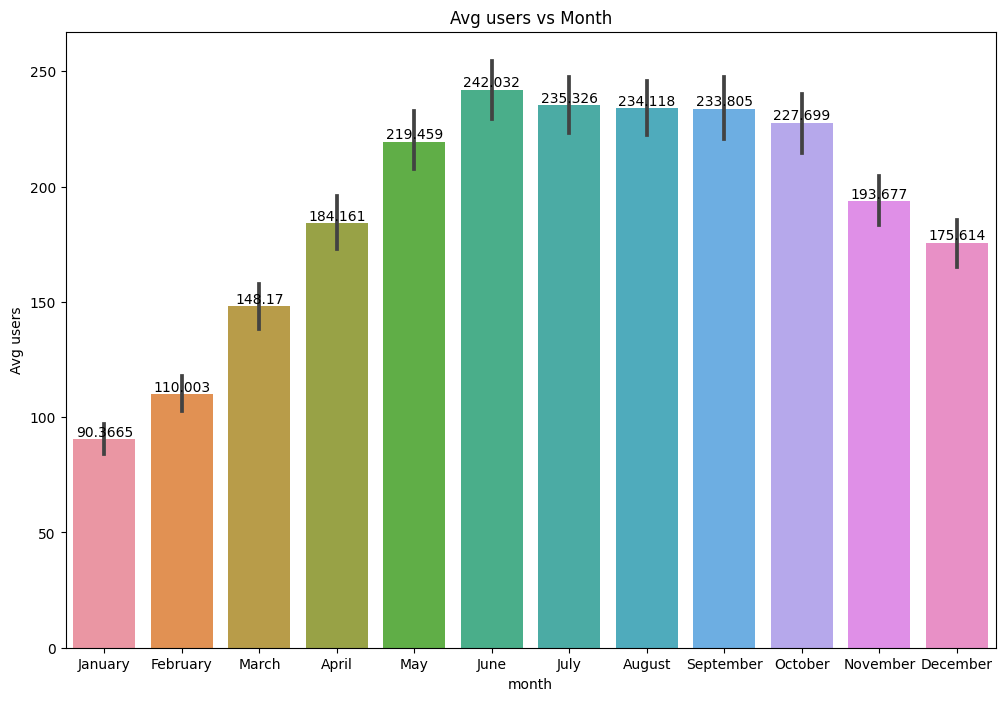

In [ ]:
plt.figure(figsize=(12,8))
label=sns.barplot(data=df,x='month',y='count',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Avg users vs Month')
plt.ylabel('Avg users')
plt.show()

### **Observations**

1. Fall (Season 3) experienced the highest overall user count and average users, followed closely by Winter (Season 4) and Summer (Season 2).

2. Weather conditions categorized as Clear, Few clouds, Partly cloudy, and Partly cloudy attracted the most users, both in terms of total count and average user engagement followed by misty and rainy weather

3. Electric cycle usage was marginally higher on working days compared to non-working days, including holidays.

4. Slightly more users opted for electric cycles on non-holiday days in comparison to holidays.

5. Fridays emerged as the most popular day for electric cycle usage, surpassing the user count on other weekdays.

6. June stood out as the month with the highest average number of users choosing electric cycles for commuting or leisure activities.

## **If Working Day has an effect on the number of electric cycles rented?**

In [ ]:
df.groupby(by=['workingday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

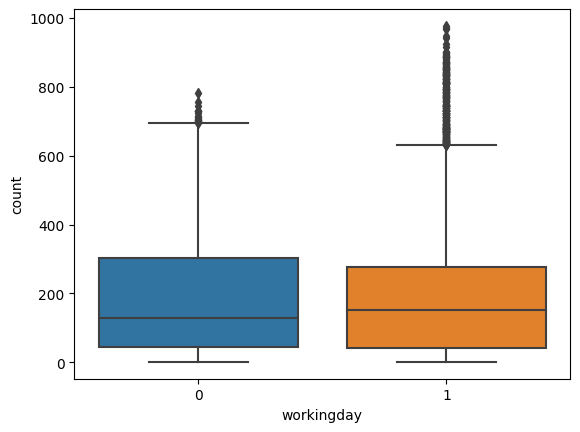

In [ ]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

### **Step 1: Setting up Null and Alternate Hypothesis**

Null Hypothesis (H0) : Working day does not have effect on Number of cycle rented

Alternate Hypothesis (Ha): Working day does have effect on Number of cycle rented

### **Step 2: Define Test-Statistics**

If the assumptions of t test are met, then we will perform t-test for 2 independent samples. If assumptions does not met, then we will perform non-parametric test for 2 independent samples i.e. Mann-Whitney U rank test



### **Step 3: Checking the basic assumptions for hypothesis**

Distribution check using QQ plot

Homogenity of variance using Levene's test

Samples are independent

### **Step 4: Compute the p-value and fix value of alpha**

With confidence of 95%, alpha is set at 0.05

### **Step 5: Compare p-value and alpha**

Based on p-value, we will accept or reject Null hypothesis

* If p-val > alpha, fail to reject Null hypothesis

* If p-val < alpha, reject Null hypothesis


### **Visual test to observe if sample follows Normal distribution**

[]

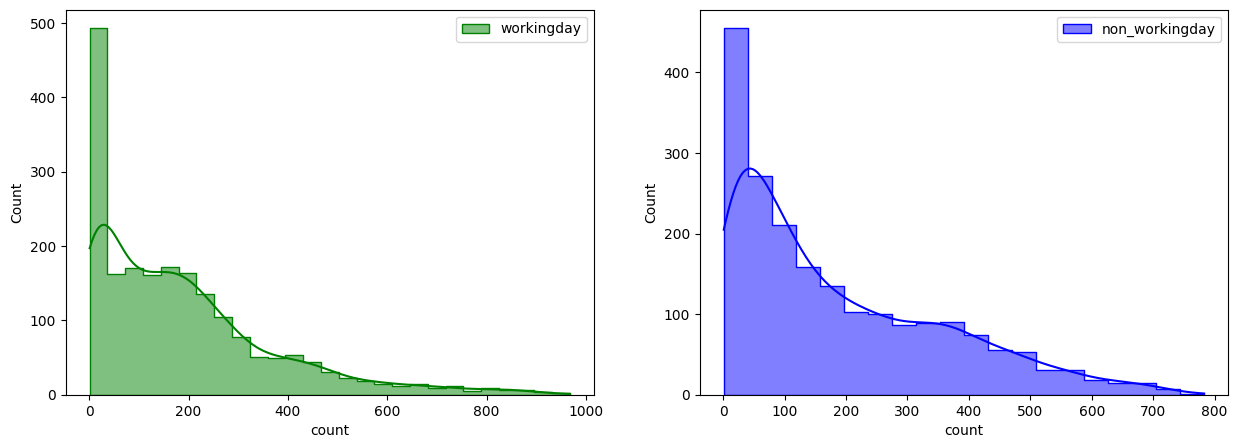

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

It is observed that sample do not follows normal distribution. Lets confirm it using other tests as well

### **QQ Plot**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

[]

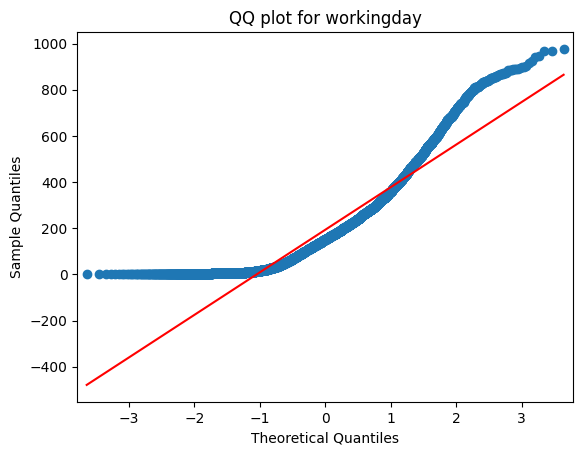

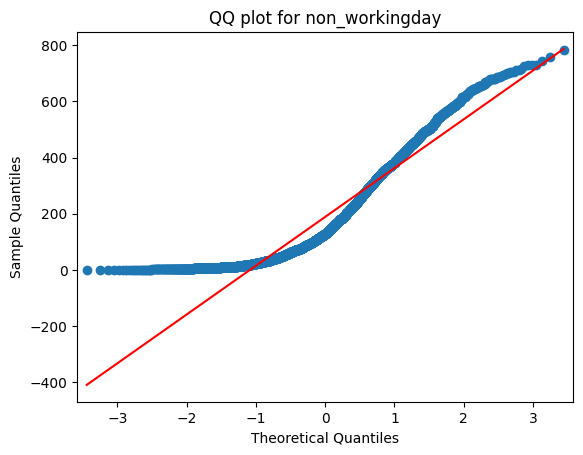

In [ ]:
df_working=df.loc[df['workingday']==1]
df_nonworking=df.loc[df['workingday']==0]

qqplot(df_working['count'], line='s')
plt.title('QQ plot for workingday')

qqplot(df_nonworking['count'], line='s')
plt.title('QQ plot for non_workingday')
plt.plot()

Sample does not follows normal distribution

### **Homogenity of variance using Levene's test**

In [ ]:
from scipy.stats import levene

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = levene(df_working['count'],
                                df_nonworking['count'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('The samples do not have Homogenous Variance')
else:
    print('Fail to reject Null Hypothesis')
    print('The samples have Homogenous Variance ')

p-value 0.9437823280916695
Fail to reject Null Hypothesis
The samples have Homogenous Variance 


Since the two independent samples are not uniformly distributed, and thus non-parametric test for 2 independent samples to be performed i.e. Mann-Whitney U rank test for 2 independent samples

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = mannwhitneyu(df_working['count'],
                                      df_nonworking['count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Fail to reject null hypothesis')
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Fail to reject null hypothesis
Mean no.of electric cycles rented is same for working and non-working days


### **It can be inferred from above testing that Average number of electric cycles rented for both Working and Non-working days is statistically not different with confidence of 95%**

### **Is number of cycles rented is same in different weather?**

In [ ]:
#weather codes
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.groupby(by=['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

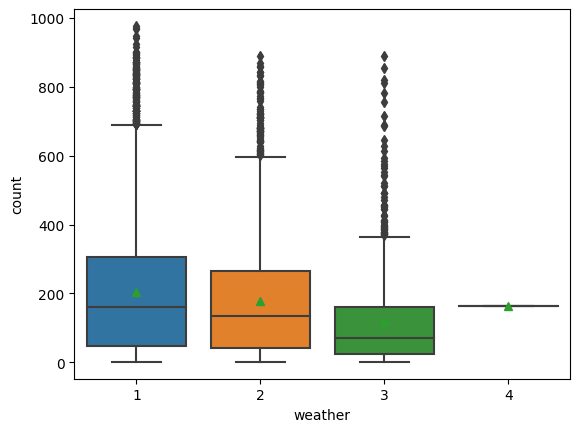

In [ ]:
sns.boxplot(data=df,x='weather',y='count',showmeans=True)
plt.plot()

In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

### **Step 1: Setting up Null and Alternate Hypothesis**

Null Hypothesis (H0) : Number of cycles rented is same for different weather

Alternate Hypothesis (Ha): Number of cycles rented is different for different weather

### **Step 2: Define Test-Statistics**

If the assumptions of One way anova test are met, then we will perform One way Anova test for 3 independent samples. If assumptions does not met, then we will perform non-parametric test for 3 independent samples i.e. Kruskal-wallis test



### **Step 3: Checking the basic assumptions for hypothesis**

Distribution check using QQ plot

Homogenity of variance using Levene's test

Samples are independent

### **Step 4: Compute the p-value and fix value of alpha**

With confidence of 95%, alpha is set at 0.05

### **Step 5: Compare p-value and alpha**

Based on p-value, we will accept or reject Null hypothesis

* If p-val > alpha, fail to reject Null hypothesis

* If p-val < alpha, reject Null hypothesis


### **Visual test to observe if sample follows Normal distribution**

[]

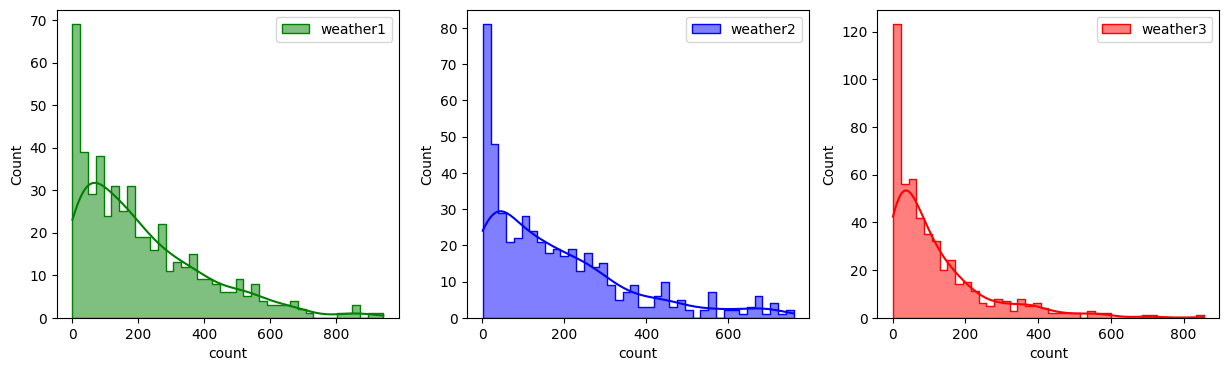

In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

It is observed that sample do not follows normal distribution. Lets confirm it using other tests as well

### **QQ Plot**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

[]

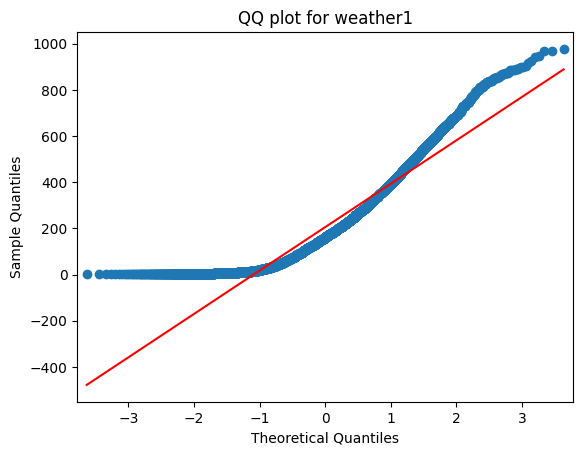

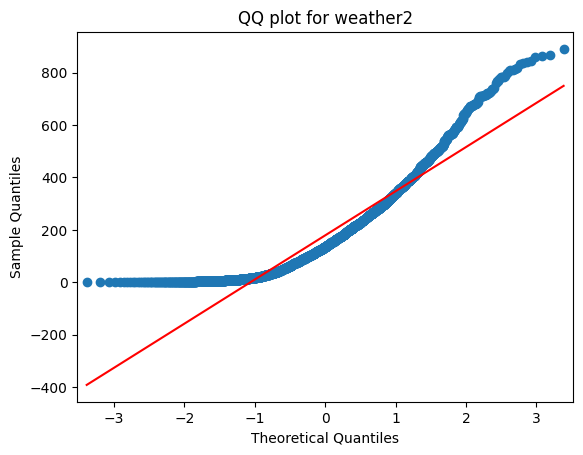

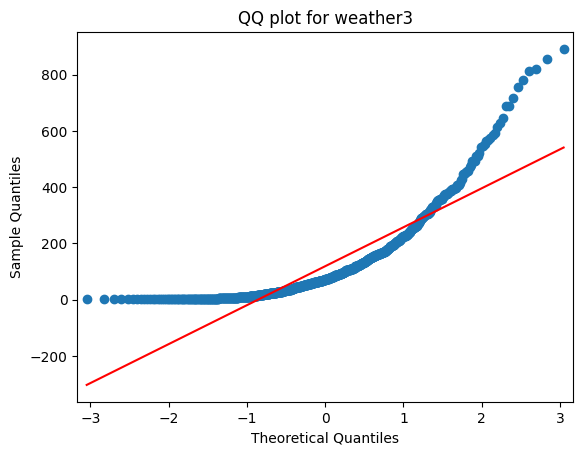

In [ ]:
qqplot(df_weather1['count'], line='s')
plt.title('QQ plot for weather1')

qqplot(df_weather2['count'], line='s')
plt.title('QQ plot for weather2')

qqplot(df_weather3['count'], line='s')
plt.title('QQ plot for weather3')
plt.plot()

Sample does not follows normal distribution

### **Homogenity of variance using Levene's test**

In [ ]:
from scipy.stats import levene

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = levene(df_weather1['count'],
                                df_weather2['count'],
                            df_weather3['count'])
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('The samples do not have Homogenous Variance')
else:
    print('Fail to reject Null Hypothesis')
    print('The samples have Homogenous Variance ')

p-value 6.198278710731511e-36
Reject Null Hypothesis
The samples do not have Homogenous Variance


Since the three independent samples are not uniformly distributed and do not have homogeneous variance, and thus non-parametric test for 3 independent samples to be performed i.e. Kruskal Wallis test for 3 independent samples

In [ ]:
from scipy.stats import kruskal

In [ ]:
# Ho : Mean no.of electric cycles rented is same for different weather
# Ha : Mean no.of electric cycles rented is not same for different weather
# Assuming significance Level to be 0.05
# Test statistics : Kruskal-Wallis test for three independent samples

test_stat, p_value = kruskal(df_weather1['count'],
                                df_weather2['count'],
                            df_weather3['count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('Mean no.of electric cycles rented is not same for different weather')
else:
    print('Fail to reject null hypothesis')
    print('Mean no.of electric cycles rented is same for different weather')

P-value : 3.122066178659941e-45
Reject Null Hypothesis
Mean no.of electric cycles rented is not same for different weather


### **It can be inferred from above testing that Average number of electric cycles rented for different weather is statistically different with confidence of 95%**

### **Is number of cycles rented is same in different season?**

In [ ]:
#season codes
# (1: spring, 2: summer, 3: fall, 4: winter)
df.groupby(by=['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


[]

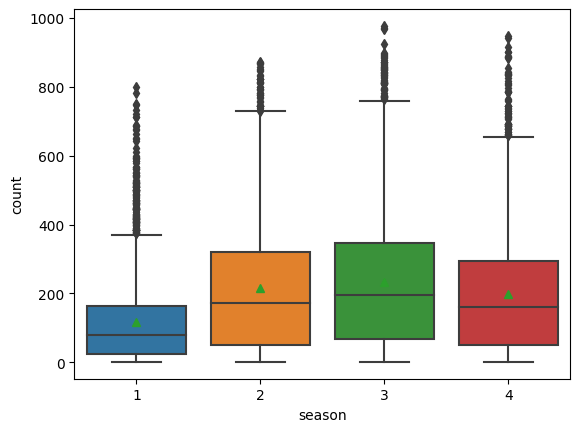

In [ ]:
sns.boxplot(data=df,x='season',y='count',showmeans=True)
plt.plot()

In [ ]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

### **Step 1: Setting up Null and Alternate Hypothesis**

Null Hypothesis (H0) : Mean of cycles rented per hour is same for different seasons

Alternate Hypothesis (Ha): Mean of cycles rented per hour is different for different seasons

### **Step 2: Define Test-Statistics**

If the assumptions of One way anova test are met, then we will perform One way Anova test for 4 independent samples. If assumptions does not met, then we will perform non-parametric test for 4 independent samples i.e. Kruskal-wallis test



### **Step 3: Checking the basic assumptions for hypothesis**

Distribution check using QQ plot

Homogenity of variance using Levene's test

Samples are independent

### **Step 4: Compute the p-value and fix value of alpha**

With confidence of 95%, alpha is set at 0.05

### **Step 5: Compare p-value and alpha**

Based on p-value, we will accept or reject Null hypothesis

* If p-val > alpha, fail to reject Null hypothesis

* If p-val < alpha, reject Null hypothesis


### **Visual test to observe if sample follows Normal distribution**

[]

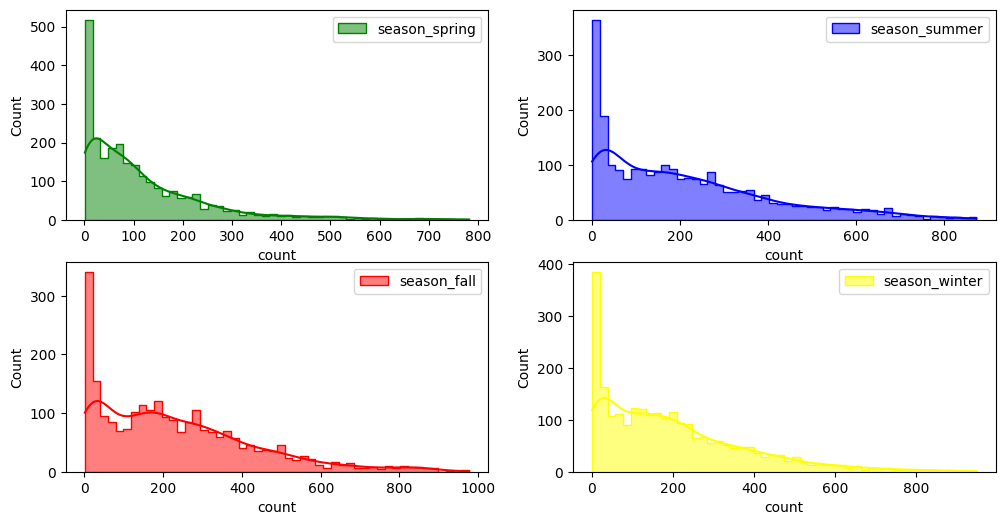

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

It is observed that sample do not follows normal distribution. Lets confirm it using other tests as well

### **QQ Plot**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

[]

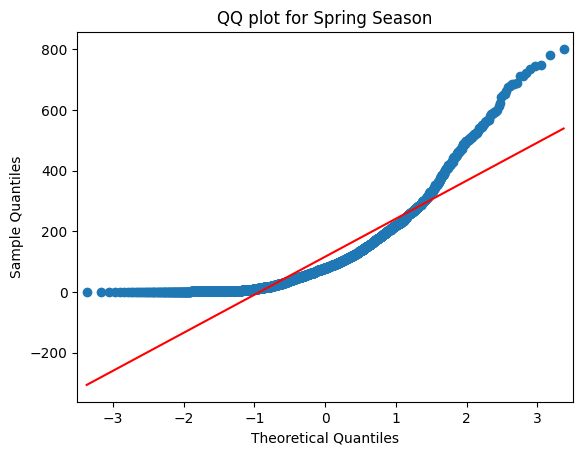

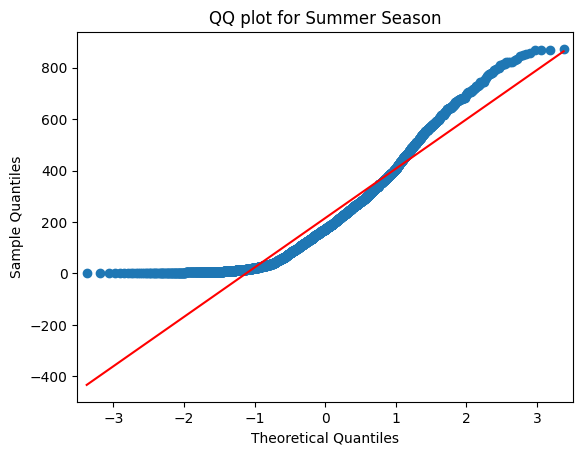

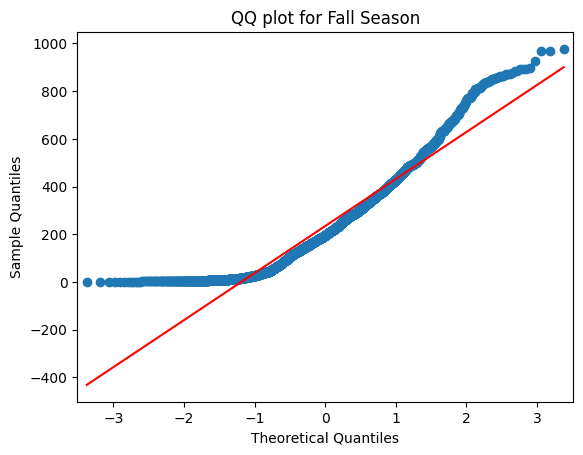

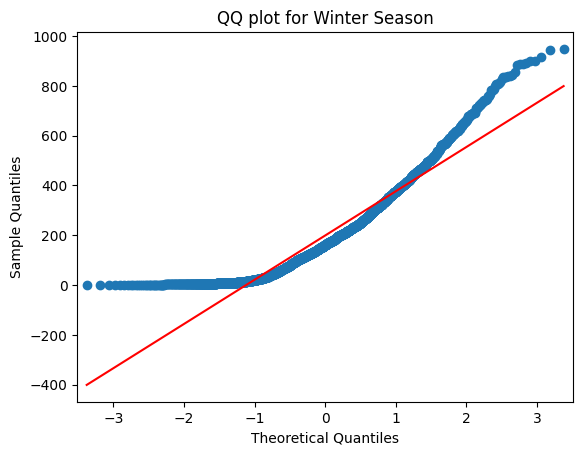

In [ ]:
qqplot(df_season_spring, line='s')
plt.title('QQ plot for Spring Season')

qqplot(df_season_summer, line='s')
plt.title('QQ plot for Summer Season')

qqplot(df_season_fall, line='s')
plt.title('QQ plot for Fall Season')

qqplot(df_season_winter, line='s')
plt.title('QQ plot for Winter Season')
plt.plot()

Sample does not follows normal distribution

### **Homogenity of variance using Levene's test**

In [ ]:
from scipy.stats import levene

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = levene(df_season_spring,
                                df_season_summer,
                            df_season_fall,
                            df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('The samples do not have Homogenous Variance')
else:
    print('Fail to reject Null Hypothesis')
    print('The samples have Homogenous Variance ')

p-value 1.0147116860043298e-118
Reject Null Hypothesis
The samples do not have Homogenous Variance


Since the four independent samples are not uniformly distributed and do not have homogeneous variance, and thus non-parametric test for 4 independent samples to be performed i.e. Kruskal Wallis test for 4 independent samples

In [ ]:
from scipy.stats import kruskal

In [ ]:
# Ho : Mean no.of electric cycles rented is same for different weather
# Ha : Mean no.of electric cycles rented is not same for different weather
# Assuming significance Level to be 0.05
# Test statistics : Kruskal-Wallis test for three independent samples

test_stat, p_value = kruskal(df_season_spring,
                                df_season_summer,
                            df_season_fall,
                            df_season_winter)
print('P-value :',p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
    print('Mean no.of electric cycles rented per hour is not same for different seasons')
else:
    print('Fail to reject null hypothesis')
    print('Mean no.of electric cycles rented per hour is same for different seasons')

P-value : 2.479008372608633e-151
Reject Null Hypothesis
Mean no.of electric cycles rented per hour is not same for different seasons


### **It can be inferred from above testing that Average number of electric cycles rented per hour for different seasons is statistically different with confidence of 95%**

### **Is weather dependent on season?**

In [ ]:
df[['weather','season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


Both weather and seasons are categorical in nature

### **Step 1: Setting up Null and Alternate Hypothesis**

Null Hypothesis (H0) : weather is independent of seasons

Alternate Hypothesis (Ha): weather is dependent of seasons

### **Step 2: Define Test-Statistics**

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.



### **Step 3: Checking the basic assumptions for hypothesis**

Both variables are categorical

All observations are independent

Cells in the contingency table are mutually exclusive.

Expected value of cells should be 5 or greater in at least 80% of cells.


### **Step 4: Compute the p-value and fix value of alpha**

With confidence of 95%, alpha is set at 0.05

### **Step 5: Compare p-value and alpha**

Based on p-value, we will accept or reject Null hypothesis

* If p-val > alpha, fail to reject Null hypothesis

* If p-val < alpha, reject Null hypothesis


The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [ ]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


Since, in above contingency table has 1 columns which has number of cycls rented in less than 5 in majority of cells,and thus we will drop this columns, and analyse the remaining ones.

In [ ]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3
season,,,
1,223009,76406,12919
2,426350,134177,27755
3,470116,139386,31160
4,356588,157191,30255


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_test_stat, p_value, dof, expected = chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [ ]:
alpha=0.05
if p_value < alpha:
    print('Reject Null Hypothesis')
    print('Seasons and weather are dependent wrt Number of cycles rented per hour')
else:
    print('Failed to reject Null Hypothesis')
    print('Seasons and weather are not dependent wrt Number of cycles rented per hour')

Reject Null Hypothesis
Seasons and weather are dependent wrt Number of cycles rented per hour


### **It can be inferred from above testing that seasons and weather are statistically dependent based on number of cycles rented per hour with confidence of 95%**

### **Insights**

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

* Out of every 100 users, around 19 are casual users and 81 are registered users.

* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

* More than 80 % of the time, the temperature is less than 28 degrees celcius.

* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

* More than 85 % of the total, windspeed data has a value of less than 20.

* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

* The hourly total number of rental bikes is statistically different for different weathers.

* The hourly total number of rental bikes is statistically different for different seasons.

### **Recommendations**

1. **Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

2. **Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

3. **User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

4. **Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

5. **Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

6. **Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

7. **Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

8. **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

9. **Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

10. **Social Media Marketing:** Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

